# Credit Card Fraud Prediction
by: Rizki Dinata

In [ ]:
from google.colab import drive
drive.mount('./drive/')

Mounted at ./drive/


## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import time

In [ ]:
!pwd

/content


In [ ]:
os.chdir('/content/drive/MyDrive/Projects/credit-fraud')

## Load Data

In [ ]:
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Cleaning

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Exploration Data Analysis

Total no Frauds: 284315
Total Frauds: 492



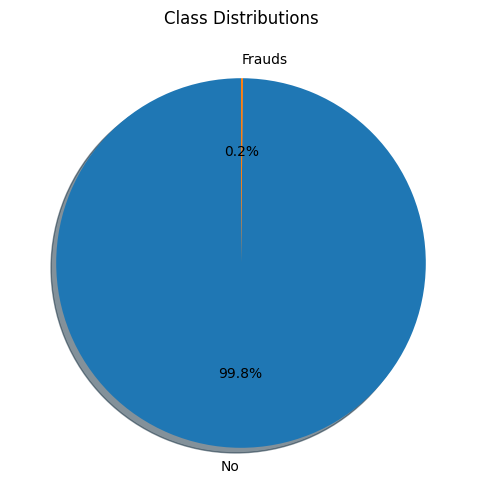

In [ ]:
#display class feature
print(f"Total no Frauds: {df['Class'].value_counts()[0]}")
print(f"Total Frauds: {df['Class'].value_counts()[1]}\n")

plt.figure(figsize=(8,6))
class_value = df['Class'].value_counts()
percent = class_value / class_value.sum()
plt.pie(percent, labels=['No', 'Frauds'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Class Distributions')
plt.show()

In [ ]:
# X = df.drop('Class', axis=1)
# y = df['Class']

# # we wil undersampling with Cluster-Based Undersampling
# from imblearn.under_sampling import ClusterCentroids

# #define undersampling by TomekLinks
# unders = ClusterCentroids(random_state=42)

# # fit and apply
# X_resample, y_resample = unders.fit_resample(X, y)

# new_df = pd.concat([pd.DataFrame(X_resample), pd.DataFrame(y_resample)], axis=1)

# print(f"Total valid: {new_df['Class'].value_counts()[0]} \nTotal fraud: {new_df['Class'].value_counts()[1]}")

In [ ]:
new_df = pd.read_csv('Credit resampled.csv', index_col=False)
new_df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,91728.056300,0.256115,0.371963,-0.371960,0.222056,0.461669,-0.051686,0.138712,-0.300830,...,-0.003060,0.018723,0.032766,0.034507,-0.167889,0.011168,0.005913,0.002546,65.141314,0
1,1,149187.291494,0.267817,0.006264,-0.687407,-0.206900,0.192694,-0.129425,0.037273,0.069627,...,0.026828,0.124524,0.019961,0.001653,-0.155631,0.003597,-0.018065,-0.015348,69.211286,0
2,2,37812.395062,-0.195129,-0.205051,0.721725,0.020521,-0.221302,0.129018,-0.134512,0.028516,...,-0.031777,-0.048663,-0.022094,0.008755,0.159398,0.013395,-0.020604,0.013713,94.803311,0
3,3,125174.019890,0.371433,-0.162350,-0.626044,-0.240021,0.378934,0.036850,0.056610,-0.004673,...,0.028255,0.165579,0.044928,0.004250,-0.119618,0.004114,-0.000860,-0.010225,65.870110,0
4,4,65184.581818,-2.084784,-3.533557,-0.696045,0.469076,-2.523046,1.697134,2.087524,-0.230583,...,0.635201,-0.172067,0.192633,0.070404,0.177864,-0.063939,0.054742,-0.033248,1156.570545,0


Text(0.5, 1.0, '\nCorrelation Matrix Resampled \n(we can use this for reference)')

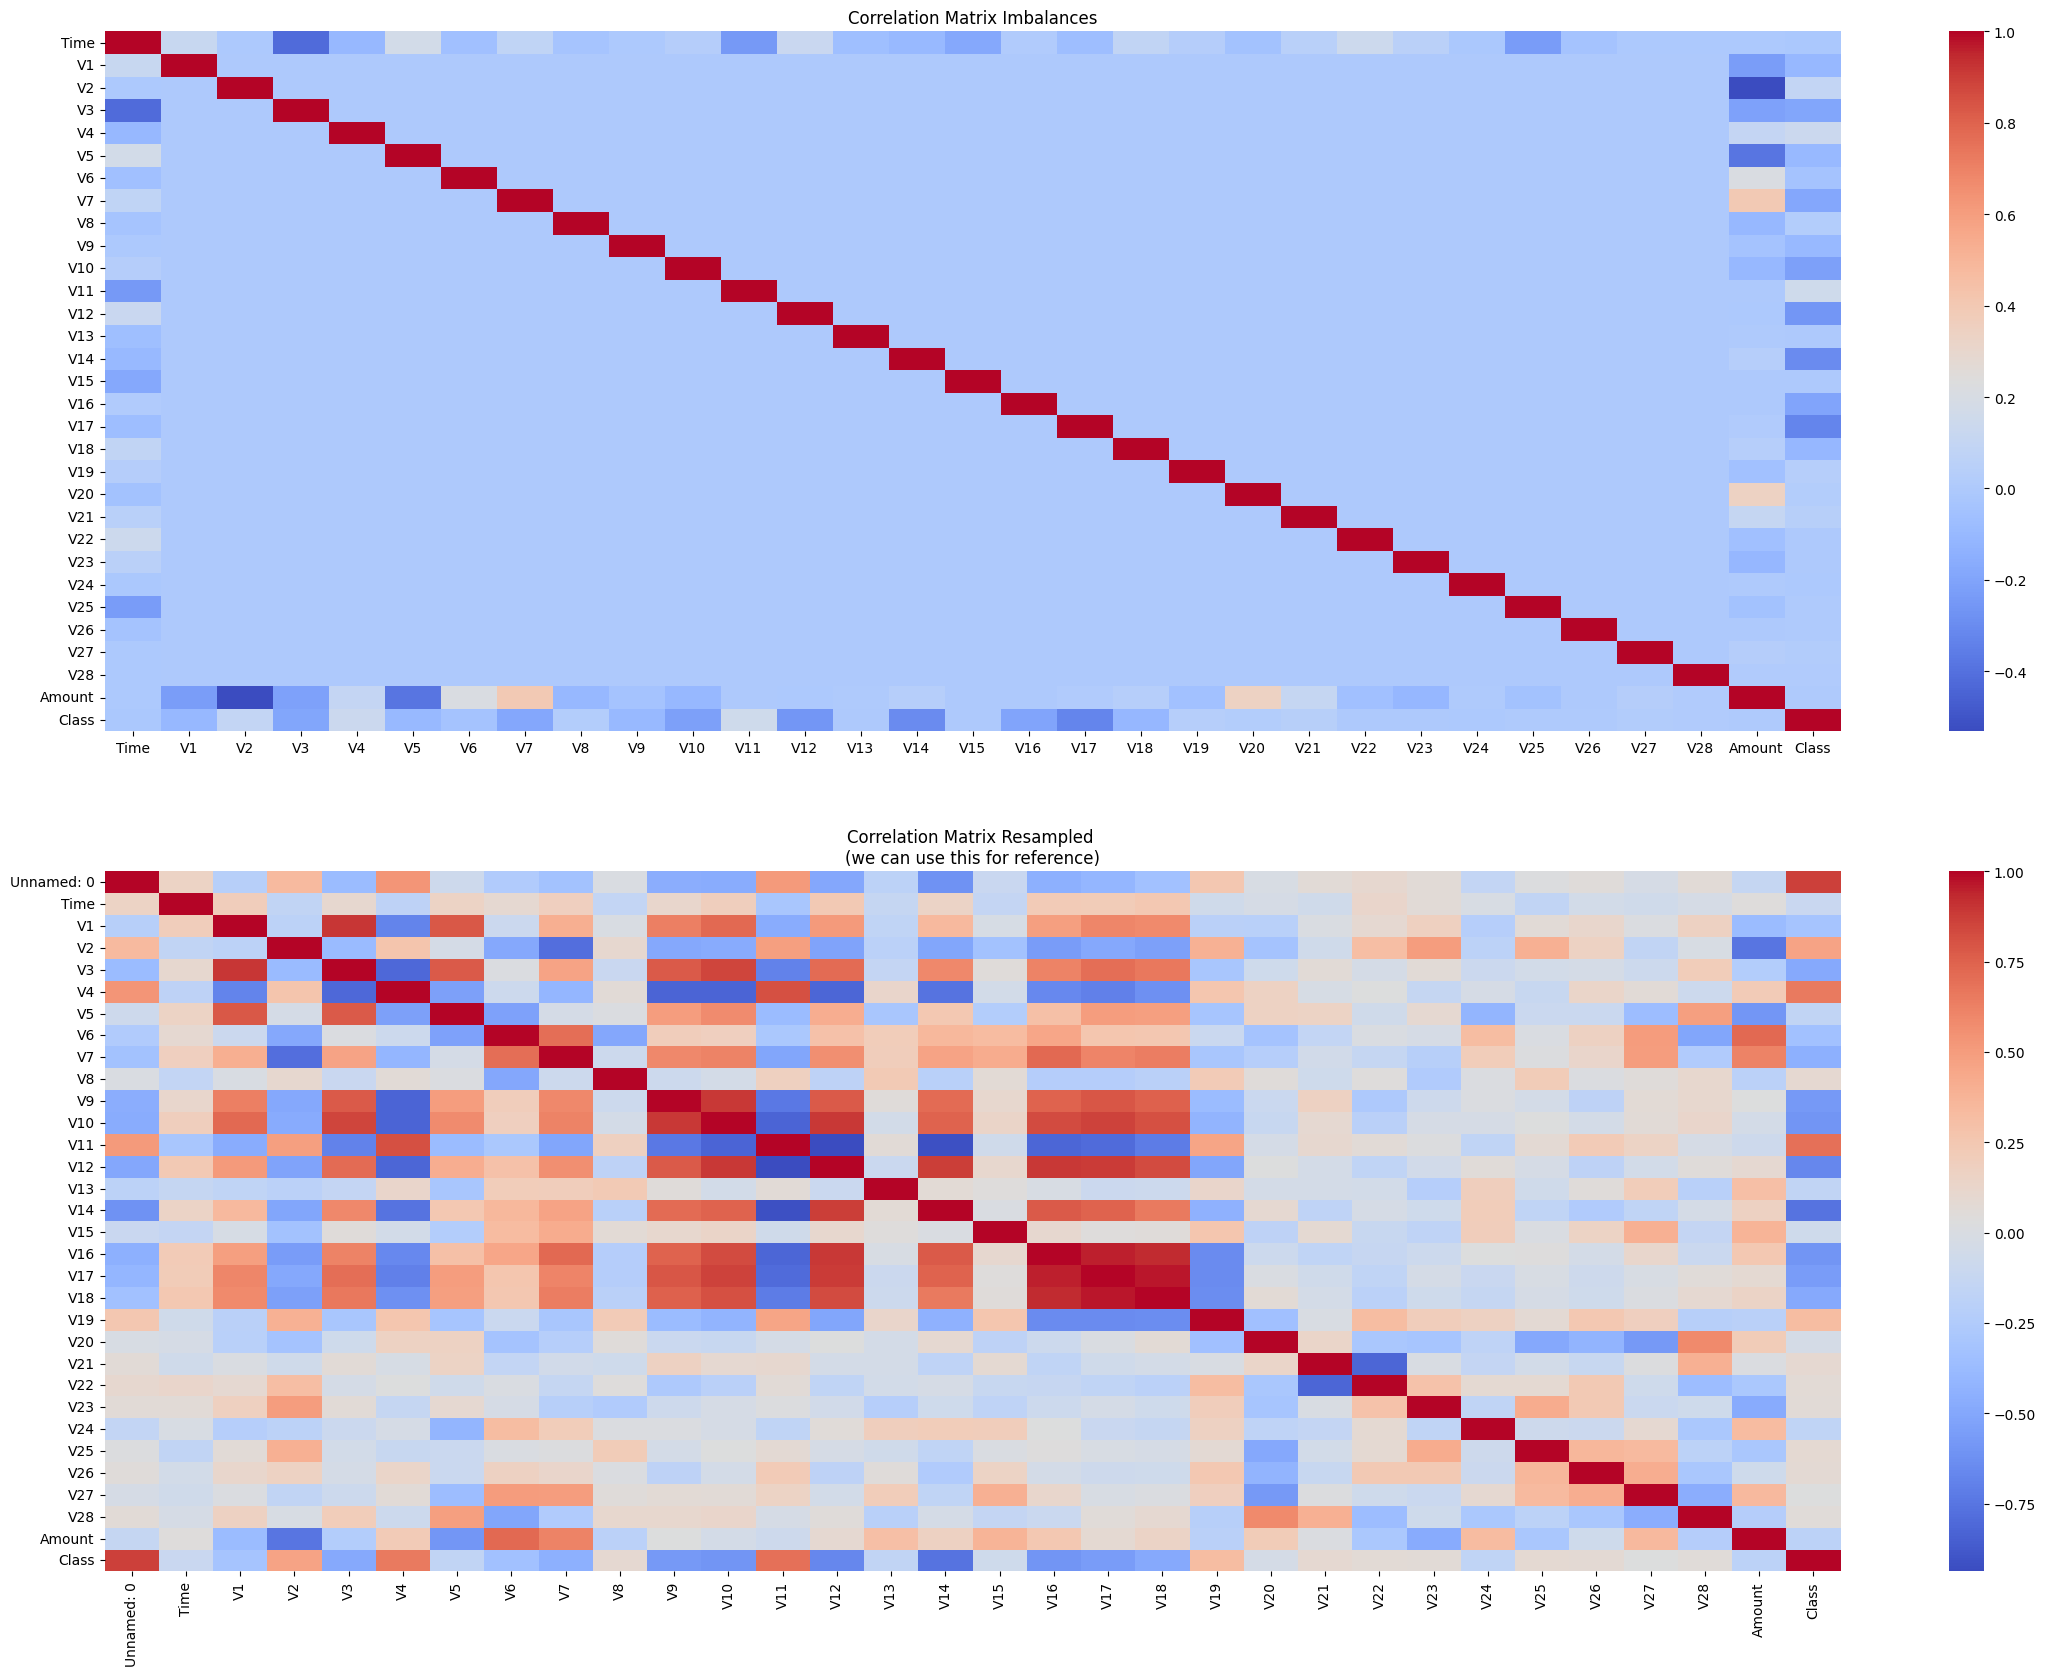

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(28,20))
sns.heatmap(df.corr(), cmap='coolwarm', ax=ax1)
ax1.set_title('Correlation Matrix Imbalances')
sns.heatmap(new_df.corr(), cmap='coolwarm', ax=ax2)
ax2.set_title('\nCorrelation Matrix Resampled')

V9, V10, V12, V14, V16, V17 have negatif correlation with Class and V2, V4, V11, V19 have positive correlation with class. This features can be our attention to improve model algorithm.

## Features Outliers

In [ ]:
columns_num = (list(df.loc[:, "Time":"Amount"]))

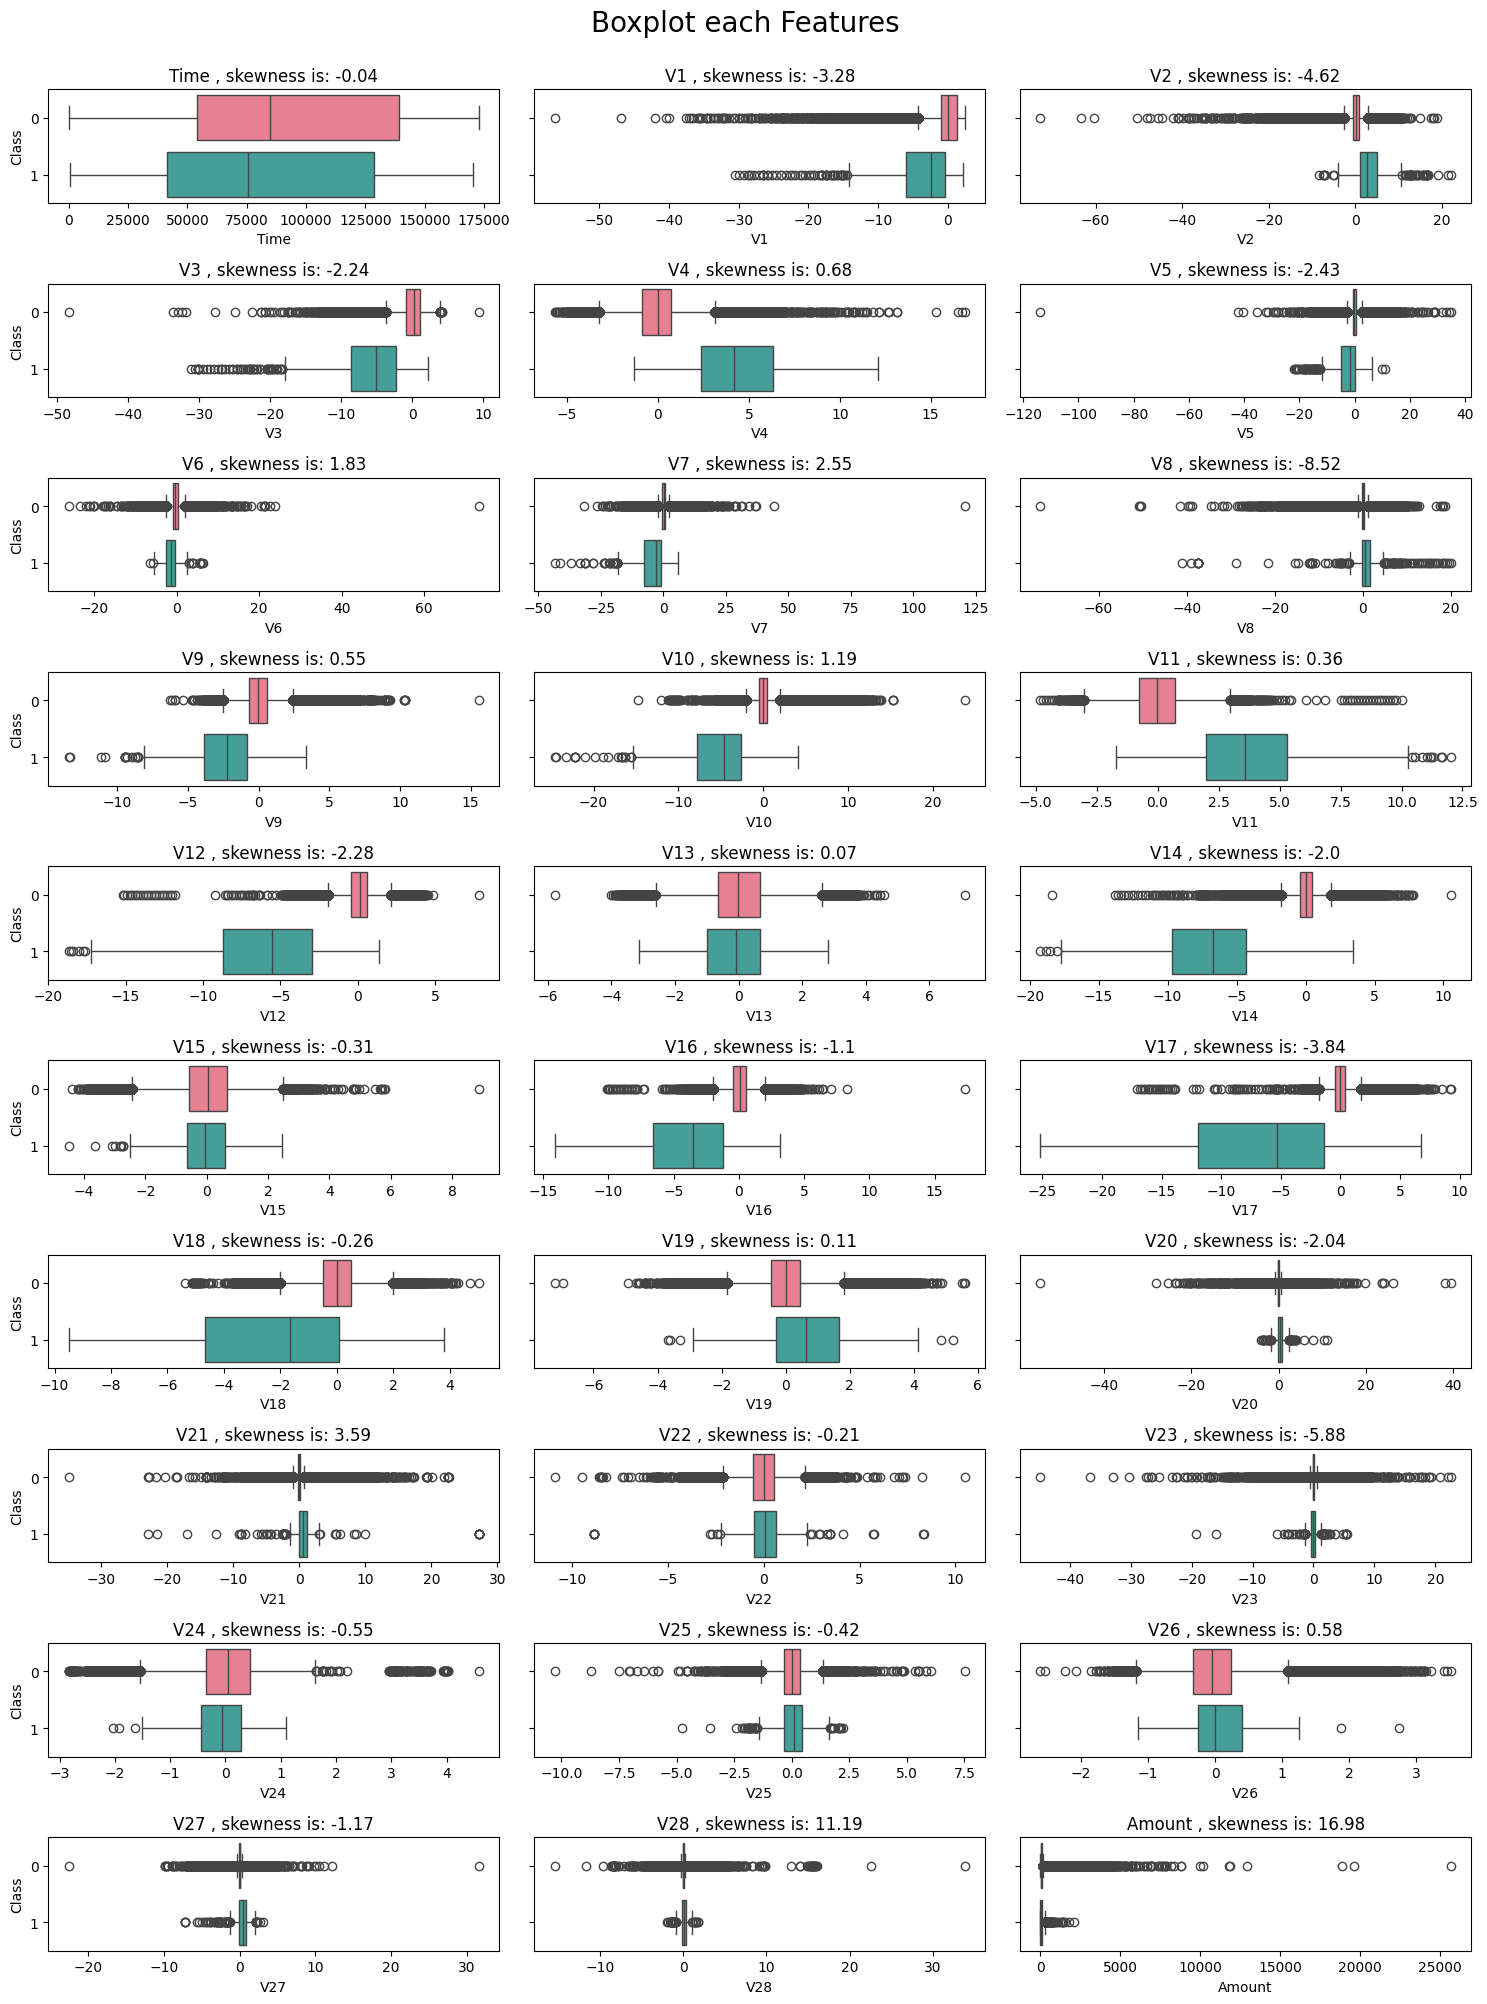

In [ ]:
def custom_boxplot(df, features, rows, cols, suptitle):
  fig, ax= plt.subplots(rows, cols, sharey=True, figsize=(15, 20))
  fig.suptitle(suptitle,y=1, size=20)
  ax = ax.flatten()
  for i, vari in enumerate(features):
    sns.boxplot(data=df,y='Class', x=vari, orient='h', ax=ax[i], palette='husl')
    ax[i].set_title(f"{vari} , skewness is: {round(df[vari].skew(axis=0, skipna=True),2)}")

#using defined boxplot
custom_boxplot(df=df, features=columns_num, rows=10, cols=3, suptitle='Boxplot each Features')
plt.tight_layout()

Dealing with outliers, we have to concern about this outliers will affect to ML model or not. Because at some cases, ML model can be sensitive with outliers such as KNearest-Negihbors.

If we want to remove outliers, we have to concern abot correlation matrix and data validation too. Sometimes features with low correlation, removing outliers or not doesn't really affect.

In [ ]:
def custom_boxplot(df, features, rows, cols, suptitle):
  fig, ax= plt.subplots(rows, cols, sharey=True, figsize=(15, 20))
  fig.suptitle(suptitle,y=1, size=20)
  ax = ax.flatten()
  for i, vari in enumerate(features):
    sns.boxplot(data=df,y='Class', x=vari, orient='h', ax=ax[i], palette='husl')
    ax[i].set_title(f"{vari} , skewness is: {round(df[vari].skew(axis=0, skipna=True),2)}")

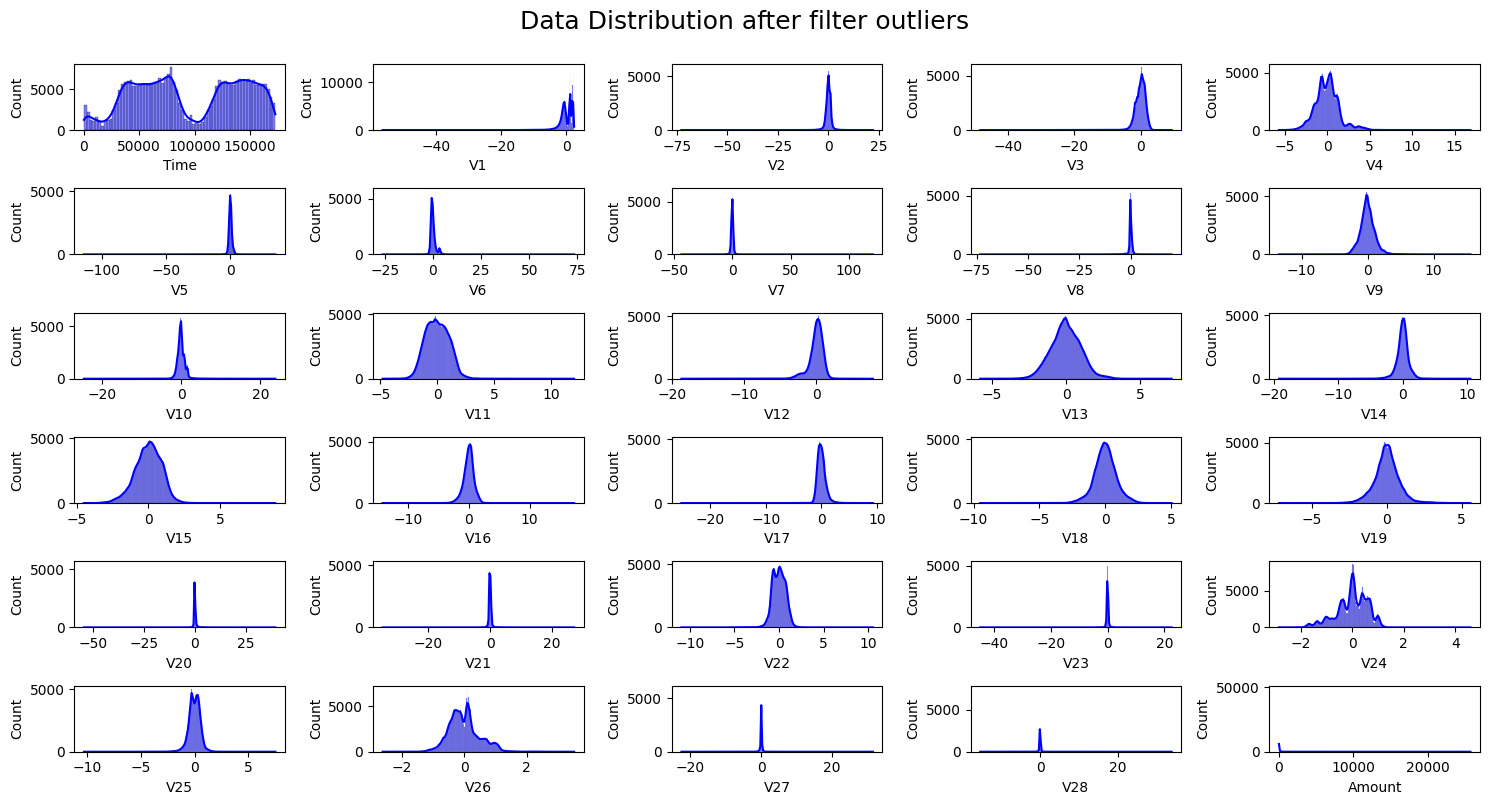

In [ ]:
def custom_histplot(df,features, rows, cols, suptitle):
    fig,ax = plt.subplots(rows, cols, figsize=(15, 8))
    plt.suptitle(suptitle, y=1, size=18)
    ax = ax.flatten()
    for i, col in enumerate(features):
      sns.histplot(df[col], color='blue', kde=True, ax=ax[i])


custom_histplot(df=df, features=columns_num, rows= 6, cols=5 ,suptitle='Data Distribution')
plt.tight_layout()

In [ ]:
#Define function detect outlier

def detect_outlier(df:pd.DataFrame, feature):

      Q1 = df[feature].quantile(0.25)
      Q3 = df[feature].quantile(0.75)
      IQR = Q3 - Q1

      low_limit = Q1 - (IQR*1.5)
      high_limit = Q3 + (IQR*1.5)
      return print(f'Total outliers in {feature} : {len(df[(df[feature] < low_limit) | (df[feature] > high_limit)])}')

def filter_outlier(df, feature):
    outliers_removed = np.array([True] * len(df))
    print(f'Data before outliers removed: {len(df)}')

    for col in feature :
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1

      low_limit = Q1 - (IQR*1.5)
      high_limit = Q3 + (IQR*1.5)
      outliers_removed = ((df[col] >= low_limit) & (df[col] <= high_limit)) & outliers_removed

    df_rem = df[outliers_removed]
    print(f'Total outliers removed: {len(df) - len(df_rem)}')
    print(f'Total data after outliers removed: {len(df_rem)}')
    return df_rem

In [ ]:
df_copy = df.copy()
dfco = filter_outlier(df = df_copy, feature=columns_num)

Data before outliers removed: 284807
Total outliers removed: 138473
Total data after outliers removed: 146334


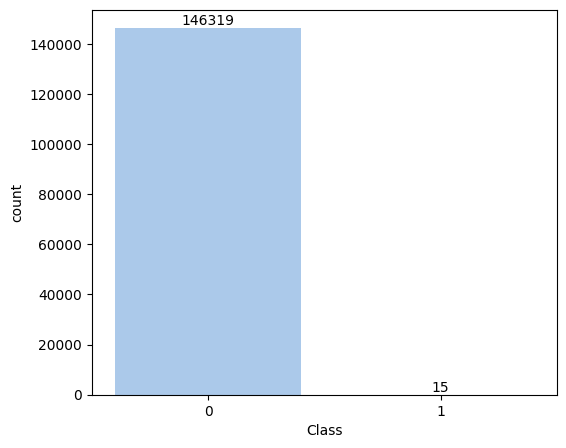

In [ ]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x='Class',data=dfco,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

as we can see, our data only **15** fraud transasction in entire datframe. Which is we almost deleted all fraude transactions from dataframe.

So we will use data before removed ouliers this time.

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#define target
X = df.drop('Class', axis=1)
y = df['Class']


#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#show total train and test datasets
print(f"Total data train: {len(y_train)} and total data test: {len(y_test)} \n")
print(f"Valid: {y_train.value_counts()[0]} or {round(y_train.value_counts()[0] / len(y_train) *100, 2)} % of dataset")
print(f"Fraud: {y_train.value_counts()[1]} or {round(y_train.value_counts()[1] / len(y_train) *100, 2)} % of dataset")

Total data train: 199364 and total data test: 85443 

Valid: 199020 or 99.83 % of dataset
Fraud: 344 or 0.17 % of dataset


In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 5, shuffle=False)

In [ ]:
start_time = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
train_score = cross_val_score(clf, X_train, y_train, cv=skf)

end_time = time.time()

print(f"Waktu training: {end_time - start_time} detik")
print(f"RandomForest cross validation score: {train_score}")
print(f"Average RandomForest cross validation score: {train_score.mean()}")

Waktu training: 1143.0829257965088 detik
RandomForest cross validation score: [0.99967396 0.99927269 0.99952349 0.99949841 0.99954856]
Average RandomForest cross validation score: 0.9995034211047846


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(f"Confusion Matrix:\n {confusion_matrix}")

Confusion Matrix:
 [[85289     6]
 [   33   115]]


In [ ]:
rf = [(rf_recall, rf_precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data=rf, columns=['Recall', 'Precision', 'F1-Score', 'Accuracy'])
rf_score.insert(0,'Random Forest with', 'No Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1-Score,Accuracy
0,No Oversampling,0.777027,0.950413,0.855019,0.999544


## SMOTE (Oversampling Sytntetic)

Because our data is imbalance, we have to oversampling data to manage our data so our class can be balance between 0 and 1 (fraud and no fraud). This time, we use oversampling by SMOTE (Synthetic Minority Oversampling Technique). SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [ ]:
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print(f"Total data train: {len(y_train_sm)} and total data test: {len(y_test)} \n")

Total data train: 398040 and total data test: 85443 



In [ ]:
start_time = time.time()

new_clf = RandomForestClassifier()
new_clf.fit(X_train_sm, y_train_sm)
train_score = cross_val_score(new_clf, X_train_sm, y_train_sm, cv=skf)

end_time = time.time()

print(f"Times training: {end_time - start_time} detik\n")
print(f"RandomForest cross validation score: {train_score}")
print(f"Average RandomForest cross validation score: {train_score.mean()}")

Times training: 2021.7487316131592 detik

RandomForest cross validation score: [0.99989951 0.99979902 0.99989951 0.99987438 0.99992463]
Average RandomForest cross validation score: 0.9998794091046126


In [ ]:
y_smpred = new_clf.predict(X_test)

In [ ]:
rf_recall = recall_score(y_test, y_smpred)
rf_precision = precision_score(y_test, y_smpred)
rf_f1 = f1_score(y_test, y_smpred)
rf_accuracy = accuracy_score(y_test, y_smpred)

cm = metrics.confusion_matrix(y_test, y_smpred)

print(f"Confusion Matrix:\n {cm}")

Confusion Matrix:
 [[85277    18]
 [   32   116]]


In [ ]:
rfsm = [(rf_recall, rf_precision, rf_f1, rf_accuracy)]

rfsm_score = pd.DataFrame(data=rfsm, columns=['Recall', 'Precision', 'F1-Score', 'Accuracy'])
rfsm_score.insert(0,'Random Forest with', 'SMOTE Oversampling')
rfsm_score

,Random Forest with,Recall,Precision,F1-Score,Accuracy
0,SMOTE Oversampling,0.783784,0.865672,0.822695,0.999415


## Class Weights

Most machine learning models provide a parameter called class weights. Without weights set, the model treats each point as equally important

In [ ]:
start_time = time.time()

rfc = RandomForestClassifier(class_weight="balanced")
rfc.fit(X_train, y_train)
train_score = cross_val_score(rfc, X_train, y_train, cv=skf)

end_time = time.time()

print(f"Times training: {end_time - start_time} detik\n")
print(f"RandomForest cross validation score: {train_score}")
print(f"Average RandomForest cross validation score: {train_score.mean()}")

Times training: 593.4462478160858 detik

RandomForest cross validation score: [0.99962381 0.99932285 0.99949841 0.99954857 0.99949839]
Average RandomForest cross validation score: 0.9994984049276194


In [ ]:
y_predc = rfc.predict(X_test)

In [ ]:
rf_recall = recall_score(y_test, y_predc)
rf_precision = precision_score(y_test, y_predc)
rf_f1 = f1_score(y_test, y_predc)
rf_accuracy = accuracy_score(y_test, y_predc)

cm_cw = metrics.confusion_matrix(y_test, y_predc)

print(f"Confusion Matrix:\n {cm_cw}")

Confusion Matrix:
 [[85292     3]
 [   44   104]]


In [ ]:
rfcw = [(rf_recall, rf_precision, rf_f1, rf_accuracy)]

rfcw_score = pd.DataFrame(data=rfcw, columns=['Recall', 'Precision', 'F1-Score', 'Accuracy'])
rfcw_score.insert(0,'Random Forest with', 'Class Weight')
rfcw_score

,Random Forest with,Recall,Precision,F1-Score,Accuracy
0,Class Weight,0.702703,0.971963,0.815686,0.99945


## Performance Comparison

In [ ]:
predictions = pd.concat([rf_score, rfsm_score, rfcw_score], ignore_index=True)

predictions.sort_values(by=['Recall'], ascending=False).reset_index(drop=True)

,Random Forest with,Recall,Precision,F1-Score,Accuracy
0,SMOTE Oversampling,0.783784,0.865672,0.822695,0.999415
1,No Oversampling,0.777027,0.950413,0.855019,0.999544
2,Class Weight,0.702703,0.971963,0.815686,0.999450


Random Forest with SMOTE has the highest recall around 0.79, which is this metric very important to classification our data is fraud or not. So, this model can be selected for the next part.

## ROC Curve


In [ ]:
from sklearn.metrics import roc_auc_score

# calculate ROC-AUC score data test
roc_auc = roc_auc_score(y_test, y_smpred)
print(f"ROC score for Random Forest: {roc_auc:.4f}")

ROC score for Random Forest: 0.8918


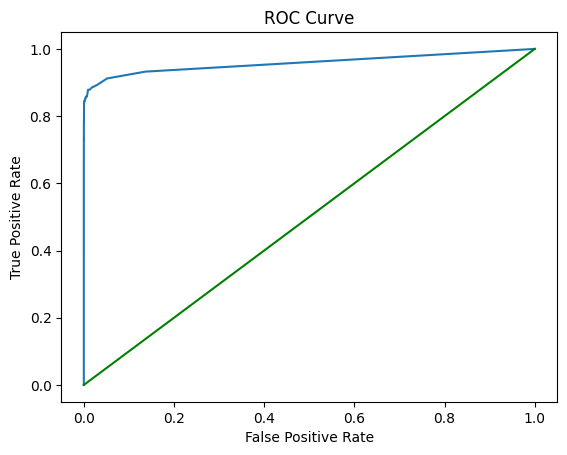

In [ ]:
#Visualize ROC curve data test

y_proba = new_clf.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.plot([0, 1], [0, 1], color = 'g')
    plt.title('ROC Curve')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])

ROC curve can be either metrics to evaluate model is overfitting or not. You have to calculted predict probability first to plot ROC Curve. Based on our AUC score round 0.8850, this model not overfitting.

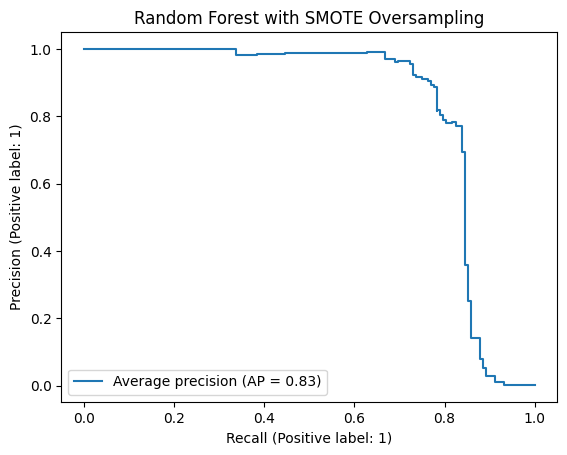

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    new_clf, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forest with SMOTE Oversampling")

# Conclusion
You can improve this model by using Hyperparameter Tunning such as GridSearch or RandomSearch so the models can be better than before not using Hyperparameter. Also you can try another algorithm or another ways to improve models on dataset with total data more than 200.000 is faster and better.